In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [83]:
df=pd.read_csv('E:\pict\sem6\dsbdal\datasets\heart.csv')

In [84]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [85]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [86]:
arr=df.columns
arr

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [88]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [89]:
i = range(14)
for x in i:
    print(arr[x])

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
target


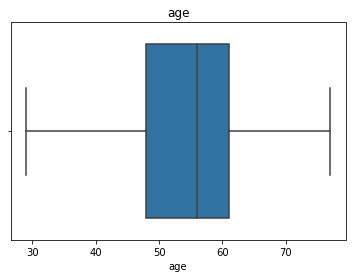

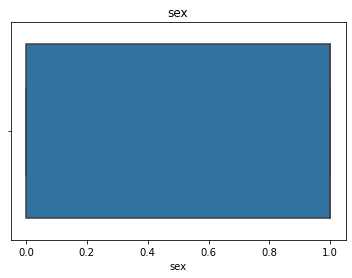

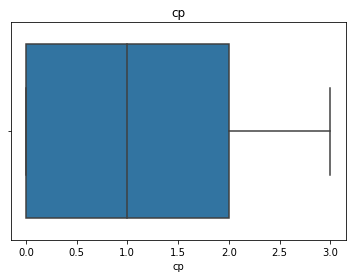

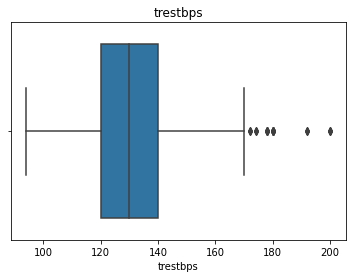

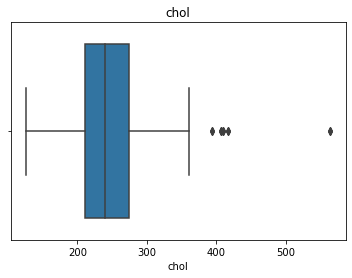

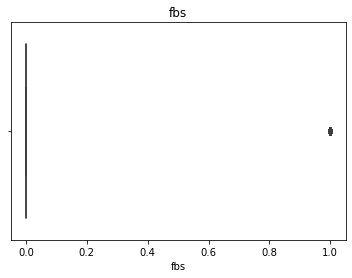

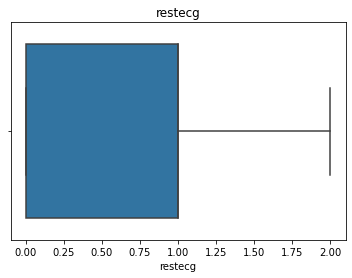

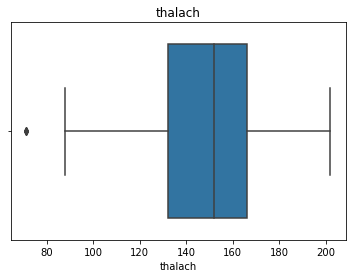

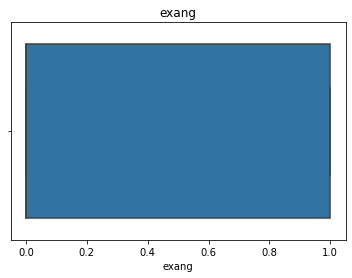

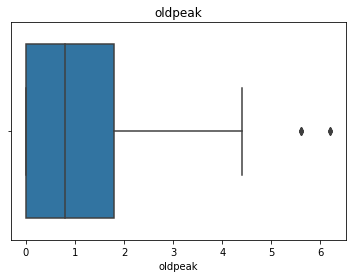

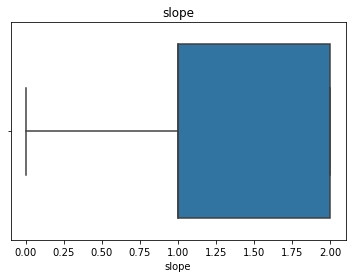

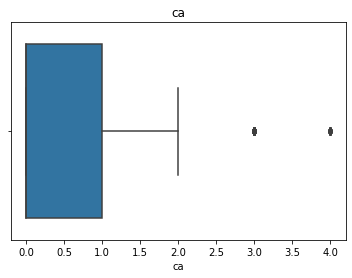

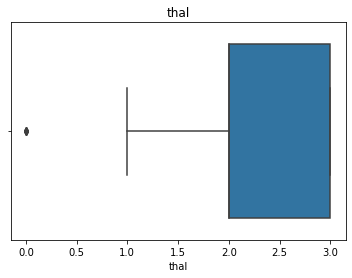

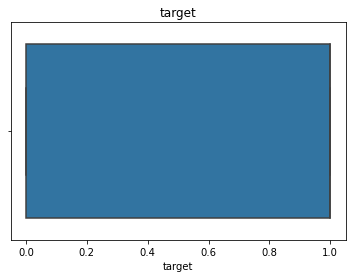

In [90]:
i = range(14)
for x in i:
    sns.boxplot(x=df[arr[x]])
    plt.title(arr[x])
    plt.show()


In [91]:
arr2=['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']

In [92]:
print(arr2)

['trestbps', 'chol', 'fbs', 'thalach', 'oldpeak', 'ca', 'thal']


In [93]:
def outliers(df1, col):
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    ls = df.index[(df1[col]<lower_bound) | (df1[col]>upper_bound)]
    return ls

In [94]:
il=[]
for f in arr2:
    il.extend(outliers(df,f))

In [95]:
il

[29,
 47,
 87,
 137,
 151,
 175,
 229,
 246,
 257,
 294,
 326,
 343,
 396,
 436,
 452,
 496,
 508,
 509,
 528,
 609,
 624,
 636,
 679,
 688,
 837,
 891,
 896,
 944,
 971,
 986,
 123,
 158,
 179,
 192,
 255,
 450,
 464,
 481,
 542,
 578,
 641,
 665,
 685,
 889,
 958,
 996,
 1,
 4,
 11,
 14,
 19,
 27,
 28,
 47,
 49,
 50,
 63,
 66,
 72,
 74,
 76,
 86,
 89,
 94,
 101,
 112,
 114,
 123,
 127,
 135,
 148,
 154,
 164,
 171,
 175,
 176,
 185,
 187,
 193,
 195,
 202,
 206,
 210,
 228,
 229,
 238,
 240,
 244,
 253,
 264,
 269,
 275,
 285,
 292,
 293,
 294,
 308,
 311,
 336,
 338,
 343,
 348,
 356,
 363,
 365,
 370,
 389,
 390,
 394,
 396,
 399,
 405,
 406,
 411,
 423,
 428,
 445,
 446,
 452,
 455,
 461,
 468,
 475,
 476,
 488,
 489,
 494,
 496,
 508,
 510,
 529,
 552,
 553,
 555,
 569,
 570,
 576,
 580,
 587,
 605,
 610,
 612,
 621,
 622,
 629,
 638,
 653,
 665,
 674,
 679,
 682,
 686,
 688,
 689,
 692,
 708,
 717,
 719,
 734,
 742,
 747,
 755,
 763,
 767,
 768,
 769,
 786,
 788,
 792,
 793,
 79

In [96]:
il = sorted(set(il))
df1=df.drop(il)
df1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


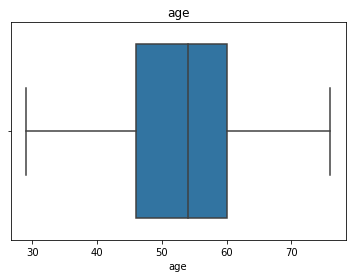

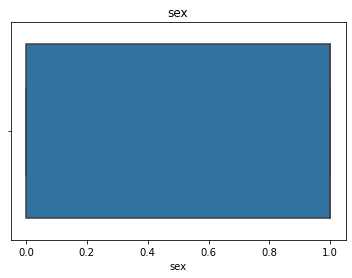

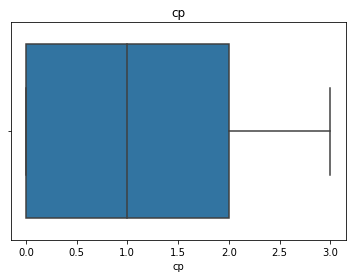

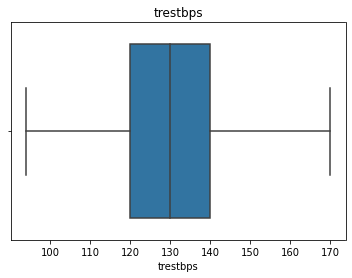

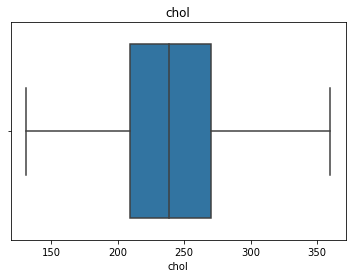

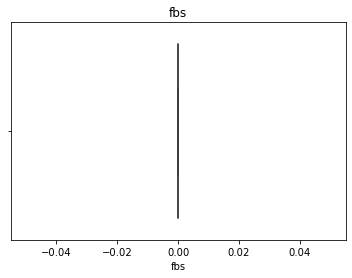

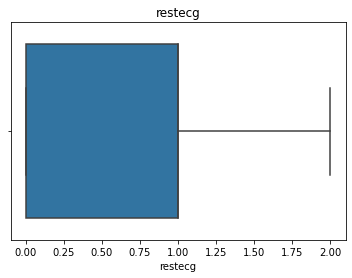

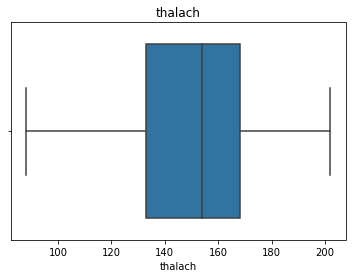

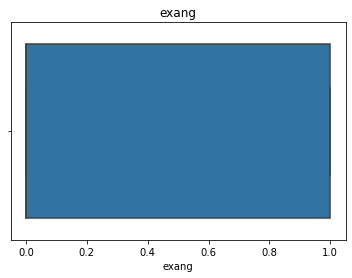

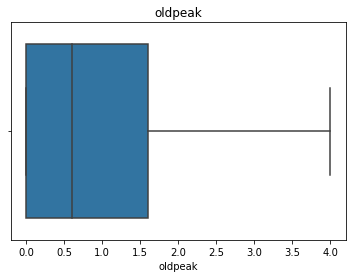

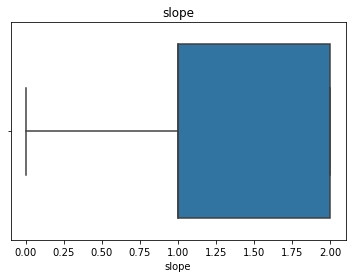

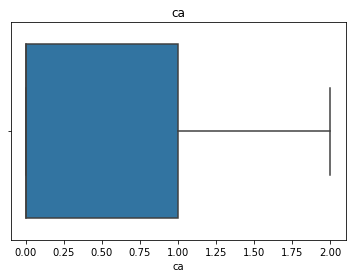

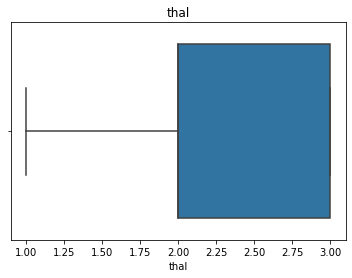

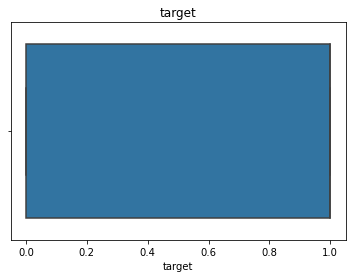

In [97]:
i = range(14)
for x in i:
    sns.boxplot(x=df1[arr[x]])
    plt.title(arr[x])
    plt.show()

In [98]:
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
target = ['target']
X = df[features]
y = df[target]

In [99]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,1


In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=234)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((768, 13), (257, 13), (768, 1), (257, 1))

In [ ]:
sns.displot(X_train)

In [ ]:
#mm = MinMaxScaler()
#X_train = mm.fit_transform(X_train)

In [ ]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)

In [ ]:
X1_train = X_train 
y1_train = y_train 

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
mean_absolute_error(y_test, y_pred)

In [ ]:
r2_score(y_test, y_pred)

In [ ]:
knnr=KNeighborsRegressor()

In [ ]:
knnr.fit(X_train, y_train)

In [ ]:
y1_pred = knnr.predict(X_test)

In [ ]:
y1_pred

In [ ]:
mean_squared_error(y_test, y1_pred)

In [ ]:
mean_absolute_error(y_test, y1_pred)

In [ ]:
r2_score(y_test, y1_pred)